<a href="https://colab.research.google.com/github/AzizahBsyrh/24523238_RegresiLinear/blob/main/RegresiLinear_24523238.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama:

*   Nur Azizah Basyirah Syamsuddin (24523238)
*   Fertika Indri Dhamaningrum (24523160)

Mengimport library yang dibutuhkan

import numpy as np -> Untuk operasi array numerik yang efisien.

import matplotlib.pyplot as plt -> Modul untuk membuat visualisasi statis, animasi, dan interaktif.

from sklearn import datasets -> Kumpulan dataset publik yang tersedia di Scikit-learn. Digunakan untuk memuat dataset yang akan dianalisis (misalnya, datasets.load_diabetes()).

from sklearn.model_selection import train_test_split -> Fungsi untuk membagi data menjadi set pelatihan dan set pengujian. Peran penting dalam memisahkan data (X dan y) menjadi X_train, X_test, y_train, dan y_test untuk melatih dan mengevaluasi model secara terpisah.

from sklearn.linear_model import LinearRegression -> Kelas estimasi (model) yang mengimplementasikan metode Ordinary Least Squares (OLS). Inti dari proyek, digunakan untuk membangun dan melatih model regresi linear (model = LinearRegression() dan model.fit()).

from sklearn.metrics import mean_squared_error, r2_score -> Kumpulan fungsi untuk menilai performa model. Digunakan untuk menghitung metrik evaluasi model, yaitu Mean Squared Error (MSE) dan $R^2$ Score, setelah model melakukan prediksi pada data pengujian.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Memuat dataset diabetes yang sudah tersedia di library scikit-learn.

In [ ]:
diabetes = datasets.load_diabetes()

print(f"Jumlah Total Sampel Data: {diabetes.data.shape[0]}") -> Menampilkan jumlah total baris(sampel data) dalam dataset.

print(f"Jumlah Total Fitur: {diabetes.data.shape[1]}") -> Menampilkan jumlah total kolom (fitur) dalam dataset.

print(f"Nama Fitur: {diabetes.feature_names}") -> Menampilkan nama-nama dari setiap fitur dalam dataset.  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
'bp': Tekanan darah (Blood Pressure).
's1': Kolesterol total (Total Cholesterol).
's2': Low-density lipoproteins (LDL), kolesterol jahat.
's3': High-density lipoproteins (HDL), kolesterol baik.
's4': Kolesterol total / HDL.
's5': Trigliserida (nilai logaritmik).
's6': Gula darah (Blood Sugar) atau glukosa serum.

print("\nKami akan memilih fitur 'bmi' (Body Mass Index) sebagai variabel independen (X).") -> Memilih fitur 'bmi' (Body Mass Index) untuk digunakan sebagai variabel independen (X) dalam model regresi linear. Menggunakan hanya satu fitur (seperti 'bmi') membuat model regresi linear menjadi model regresi linear sederhana (simple linear regression). Ini lebih mudah untuk dipahami dan divisualisasikan daripada regresi linear berganda (multiple linear regression) yang menggunakan banyak fitur.  Body Mass Index (BMI) adalah faktor risiko yang diketahui untuk diabetes. Ada hubungan yang jelas antara BMI dan perkembangan penyakit diabetes, sehingga masuk akal untuk menggunakannya sebagai prediktor.


In [ ]:
print(f"Jumlah Total Sampel Data: {diabetes.data.shape[0]}")
print(f"Jumlah Total Fitur: {diabetes.data.shape[1]}")
print(f"Nama Fitur: {diabetes.feature_names}")
print("\nKami akan memilih fitur 'bmi' (Body Mass Index) sebagai variabel independen (X).")

Jumlah Total Sampel Data: 442
Jumlah Total Fitur: 10
Nama Fitur: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Kami akan memilih fitur 'bmi' (Body Mass Index) sebagai variabel independen (X).


X = diabetes.data[:, np.newaxis, 2] -> Memilih data dari kolom ketiga (indeks 2) dari diabetes.data. Kolom ketiga ini adalah fitur 'bmi'. np.newaxis digunakan untuk mengubah bentuk array agar sesuai dengan format yang dibutuhkan oleh Scikit-learn (memastikan X memiliki dimensi dua, yaitu (jumlah_sampel, 1)).

y = diabetes.target -> Memilih data dari diabetes.target, yang merupakan variabel dependen (variabel yang ingin kita prediksi), yaitu ukuran perkembangan penyakit diabetes.

In [ ]:
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

Ketika kode ini dieksekusi, outputnya akan memberi tahu berapa banyak baris dan kolom (atau elemen, untuk array 1D) yang ada dalam variabel X dan y. Ini adalah langkah debugging atau verifikasi yang umum untuk memastikan bahwa data dalam format yang benar sebelum melanjutkan ke langkah pemodelan.
Variabel Independen (X): Berbentuk array 2 dimensi dengan 442 baris dan 1 kolom. Ini adalah format yang tepat yang dibutuhkan oleh Scikit-learn untuk input fitur, di mana 442 adalah jumlah sampel (pasien) dan 1 adalah jumlah fitur yang digunakan (yaitu, 'bmi'). Variabel Dependen (y): Berbentuk array 1 dimensi dengan 442 elemen. Ini juga format yang tepat yang dibutuhkan oleh Scikit-learn untuk target, di mana 442 adalah jumlah nilai target yang sesuai dengan 442 sampel.


In [ ]:
print(f"Dimensi Variabel Independen (X): {X.shape}")
print(f"Dimensi Variabel Dependen (y): {y.shape}")

Dimensi Variabel Independen (X): (442, 1)
Dimensi Variabel Dependen (y): (442,)


Menampilkan data frame sederhana untuk melihat beberapa baris data.

import pandas as pd: Baris ini mengimpor library pandas. Pandas adalah library yang sangat populer di Python untuk analisis dan manipulasi data. Ia menyediakan struktur data seperti DataFrame yang mirip dengan tabel atau spreadsheet.

df = pd.DataFrame(X, columns=['BMI']): Baris ini membuat DataFrame pandas baru.

pd.DataFrame(X, ...): Mengambil array NumPy X (yang berisi data 'bmi') sebagai sumber data untuk DataFrame.

columns=['BMI']: Memberikan nama kolom "BMI" untuk data di dalam DataFrame.
Hasilnya disimpan dalam variabel df. Saat ini, df adalah DataFrame dengan satu kolom bernama 'BMI' yang berisi nilai-nilai BMI dari X.

df['Progress Penyakit'] = y: Baris ini menambahkan kolom baru ke DataFrame df.

df['Progress Penyakit']: Menentukan nama kolom baru yang akan dibuat, yaitu "Progress Penyakit".
= y: Mengisi kolom baru ini dengan data dari array NumPy y (yang berisi nilai target perkembangan penyakit).
Sekarang, df adalah DataFrame dengan dua kolom: 'BMI' dan 'Progress Penyakit'.

print("5 Baris Data Pertama:"): Baris ini hanya mencetak teks "5 Baris Data Pertama:" ke output untuk memberikan konteks pada output berikutnya.

print(df.head()): Baris ini menampilkan lima baris pertama dari DataFrame df. Metode .head() pada DataFrame pandas adalah cara cepat untuk melihat sampel data teratas, yang sangat berguna untuk memeriksa apakah data dimuat dengan benar dan terlihat seperti yang diharapkan.

In [ ]:
import pandas as pd
df = pd.DataFrame(X, columns=['BMI'])
df['Progress Penyakit'] = y
print("5 Baris Data Pertama:")
print(df.head())

5 Baris Data Pertama:
        BMI  Progress Penyakit
0  0.061696              151.0
1 -0.051474               75.0
2  0.044451              141.0
3 -0.011595              206.0
4 -0.036385              135.0


Visualisasi hubungan antara BMI (X) dan Progress Penyakit (y).

Kode ini menggunakan library matplotlib.pyplot (yang diimpor sebagai plt) untuk menghasilkan sebuah visualisasi berupa diagram pencar (scatter plot) yang menunjukkan hubungan antara Body Mass Index (BMI) dan perkembangan penyakit diabetes berdasarkan data.


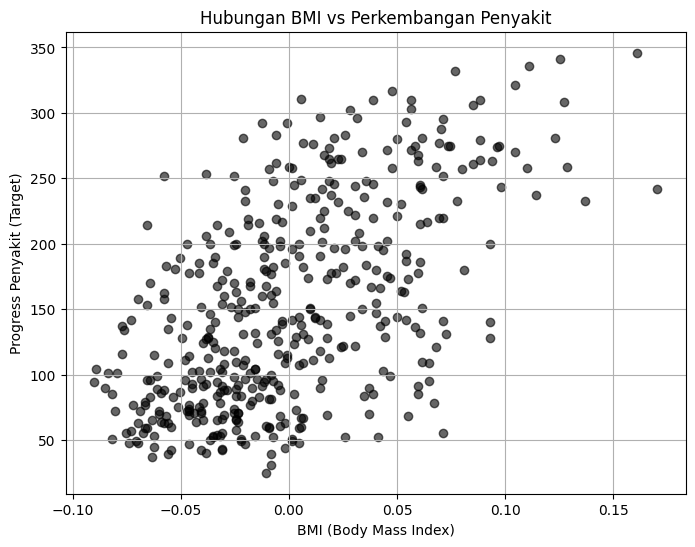

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='black', alpha=0.6)
plt.title('Hubungan BMI vs Perkembangan Penyakit')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Progress Penyakit (Target)')
plt.grid(True)
plt.show()

Pisahkan data menjadi Training Set dan Testing Set.
Rasio pembagian 80% Training dan 20% Testing. test_size=0.2, itu langsung memberi tahu bahwa set pengujian akan terdiri dari 20% dari total data, dan set pelatihan akan terdiri dari 80% sisanya.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data Training (X_train): {X_train.shape[0]} sampel")
print(f"Jumlah data Testing (X_test): {X_test.shape[0]} sampel")

Jumlah data Training (X_train): 353 sampel
Jumlah data Testing (X_test): 89 sampel


Inisialisasi model.

In [ ]:
model = LinearRegression()

Latih model menggunakan data training

In [ ]:
model.fit(X_train, y_train)

print("\nModel Linear Regression berhasil dilatih.")


Model Linear Regression berhasil dilatih.


**Prediksi pada data testing**

Kode ini menghitung Mean Squared Error (MSE), yaitu rata-rata dari kuadrat selisih antara nilai aktual (y_test) dan nilai prediksi (y_pred). MSE adalah metrik yang digunakan untuk mengukur seberapa dekat prediksi model dengan nilai sebenarnya. Semakin kecil nilai MSE, semakin baik performa model.

Kode ini menggunakan fungsi mean_squared_error() untuk melakukan perhitungan.

In [ ]:
y_pred = model.predict(X_test)

**Nilai koefisien regresi (slope & intercept)**

Kode ini mencetak nilai koefisien (slope) dan intercept dari model regresi linear yang telah dilatih.

Slope menunjukkan seberapa besar perubahan pada variabel dependen (perkembangan penyakit) untuk setiap perubahan satu unit pada variabel independen (BMI).
Intercept menunjukkan nilai variabel dependen ketika variabel independen bernilai 0.
Nilai-nilai ini mendefinisikan garis regresi.

In [ ]:
print(f"Slope: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Slope: 998.5776891375598
Intercept: 152.00335421448167


**Mean Squared Error (MSE)**

Kode ini menghitung Mean Squared Error (MSE), yaitu rata-rata dari kuadrat selisih antara nilai aktual (y_test) dan nilai prediksi (y_pred).
MSE adalah metrik untuk mengukur seberapa dekat prediksi model dengan nilai sebenarnya.
Kode ini menggunakan fungsi mean_squared_error() untuk melakukan perhitungan tersebut dan kemudian mencetak hasilnya

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 4061.8259284949268


**Plot garis regresi dan titik data aktual**

Kode ini menggunakan library matplotlib.pyplot (yang diimpor sebagai plt) untuk menghasilkan sebuah visualisasi berupa diagram pencar (scatter plot) yang menunjukkan hubungan antara Body Mass Index (BMI) dan perkembangan penyakit diabetes berdasarkan data.

1. plt.figure(figsize=(8, 6)) digunakan untuk membuat sebuah figure baru untuk plot dengan ukuran lebar 8 inci dan tinggi 6 inci. Ini memberikan kontrol atas ukuran visualisasi.
2. plt.scatter(X_test, y_test, color='black', alpha=0.6, label='Data Aktual') digunakan untuk embuat diagram pencar.
3. X_test adalah data pada sumbu X (BMI dari set pengujian).
4. y_test adalah data pada sumbu Y (perkembangan penyakit aktual dari set pengujian).
5. color='black' digunakan untuk mengatur warna titik-titik data menjadi hitam.
6. alpha=0.6 digunakan untuk mengatur transparansi titik-titik data menjadi 60%, memungkinkan melihat titik-titik yang tumpang tindih.
6. label='Data Aktual'digunakan untuk memberikan label "Data Aktual" untuk titik-titik ini di legenda.
7. plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Garis Regresi')digunakan untuk menambahkan garis regresi ke plot.
9. X_test adalah data pada sumbu X (BMI dari set pengujian).
10. y_pred adalah data pada sumbu Y (nilai perkembangan penyakit yang diprediksi oleh model untuk set pengujian).
11. color='blue' digunakan untuk mengatur warna garis menjadi biru.
12. linewidth=3 digunakan untuk mengatur ketebalan garis menjadi 3 pixel.
13. label='Garis Regresi' digunakan untuk memberikan label "Garis Regresi" untuk garis ini di legenda.
14. plt.title('Regresi Linear: BMI vs Progress Penyakit') digunakan untuk menambahkan judul pada plot.
15. plt.xlabel('BMI (Body Mass Index)')digunakan untuk menambahkan label pada sumbu X.
16. plt.ylabel('Progress Penyakit (Target)') digunakan untuk menambahkan label pada sumbu Y.
17. plt.legend() digunakan untuk menampilkan legenda pada plot, yang menjelaskan label untuk titik data dan garis regresi.
18. plt.grid(True) digunakan untuk menampilkan grid pada plot untuk membantu membaca nilai-nilai.
19. plt.show() digunakan untuk menampilkan plot yang telah dibuat.

Kode ini memvisualisasikan data pengujian dan garis regresi yang dihasilkan oleh model, memungkinkan kita melihat secara grafis seberapa baik garis regresi sesuai dengan data aktual.

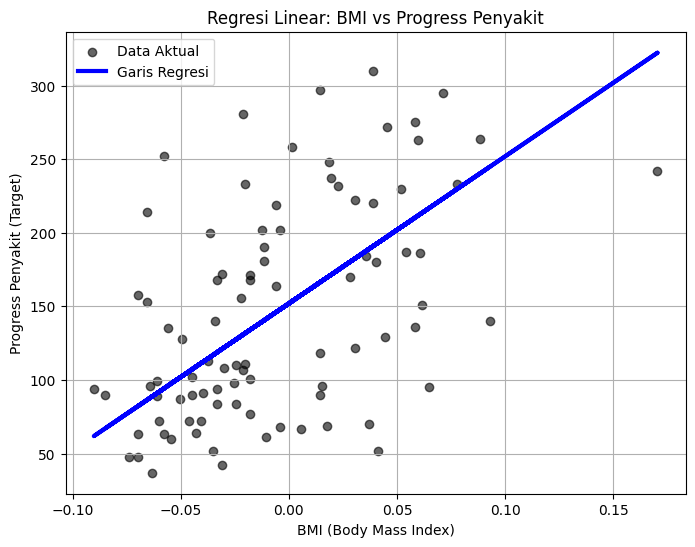

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='black', alpha=0.6, label='Data Aktual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Garis Regresi')
plt.title('Regresi Linear: BMI vs Progress Penyakit')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Progress Penyakit (Target)')
plt.legend()
plt.grid(True)
plt.show()

**Perbandingan hasil prediksi dengan nilai aktual**

Kode ini membuat sebuah DataFrame pandas bernama comparison_df yang berisi dua kolom: 'Nilai Aktual' (dari y_test) dan 'Hasil Prediksi' (dari y_pred). Kemudian, kode ini mencetak judul dan lima baris pertama (.head()) dari DataFrame tersebut untuk menampilkan perbandingan awal antara nilai aktual dan hasil prediksi model.

In [ ]:
comparison_df = pd.DataFrame({'Nilai Aktual': y_test.flatten(), 'Hasil Prediksi': y_pred.flatten()})
print("Perbandingan Hasil Prediksi dengan Nilai Aktual (beberapa baris pertama):")
print(comparison_df.head())

Perbandingan Hasil Prediksi dengan Nilai Aktual (beberapa baris pertama):
   Nilai Aktual  Hasil Prediksi
0         219.0      145.806227
1          70.0      188.857390
2         202.0      147.958785
3         230.0      203.925298
4         111.0      131.814599


**Analisis dan Kesimpulan:**
1. Apa makna dari slope dan intercept?
Slope adalah nilai yang menunjukkan

*   Slope adalah nilai yang menunjukkan tingkat perubahan atau gradien dari variabel dependen (Y) untuk setiap kenaikan satu unit pada variabel independen (X).
*   Intercept adalah nilai konstanta yang merepresentasikan titik potong garis regresi dengan sumbu Y, atau dengan kata lain, nilai prediksi Y ketika semua variabel independen (X) bernilai nol.
2. Seberapa baik model memprediksi data?
Berdasarkan scatter plot dan perbandingan yang dilakukan, model regresi linear cukup baik namun belum optimal. Dari grafik terlihat bahwa masih cukup banyak data aktual (titik abu-abu) yang tersebar cukup jauh dari garis prediksi. Hal ini dibuktikan pula pada tabel perbandingan yang menunjukkan selisih prediksi cukup besar.
3. Apakah ada indikasi overfitting atau underfitting?
Ya, ada indikasi underfitting.Hal ini terjadi karena dalam scatter plot terlihat garis regresi linear lurus masih cukup banyak titik data tersebar jauh dari garis prediksi baik di atas maupun di bawah.